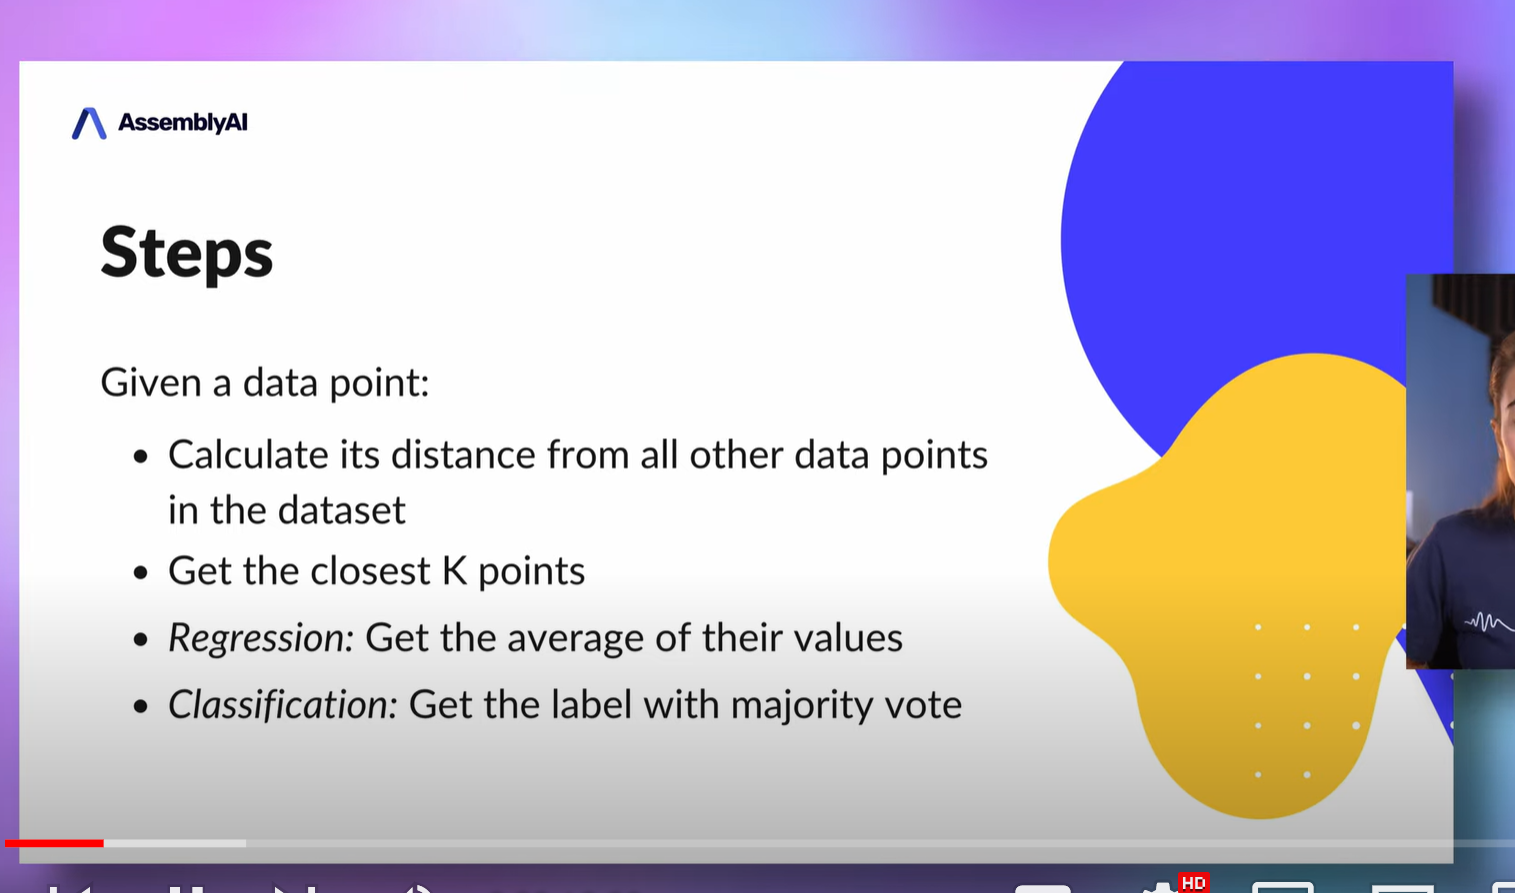

In [2]:
import numpy as np
import pandas as pd
from collections import Counter 

In [16]:
class KNN:
    def __init__(self,k):
        self.k = k
    
    def euclidean_dist(self,x1,x2):
        return np.sqrt(np.sum((x2-x1)**2))
    
    def fit(self,X,y):
        self.X_train = X
        self.y_train = y
    
    def predict(self,X):
        predictions = [self._predict(x) for x in X]
        return predictions
    
    def _predict(self,x):
        distances = [self.euclidean_dist(x,x1) for x1 in self.X_train]
        
        #get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        #majority vote
        most_common = Counter(k_nearest_labels).most_common()
        
        return most_common[0][0] #return name of the label, count is not req
        

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [5]:
iris = datasets.load_iris()
X,y = iris.data, iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


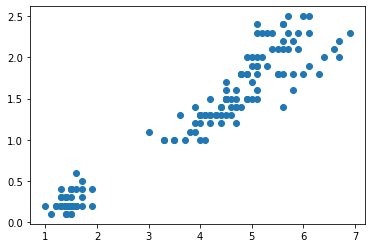

In [6]:
plt.scatter(X[:,2],X[:,3])

In [17]:
clf = KNN(5)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)

In [20]:
acc = np.sum(y_test == preds)/len(y_test)
acc

0.9666666666666667

In [18]:
preds

[0,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0]